In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime
import yfinance as yf

In [2]:
symbol = 'BANKBARODA.NS'
start_date = '2000-01-01'
end_date = '2020-01-01'

# Fetch historical data
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.shape

(4348, 6)

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-24,99.800003,100.650002,99.599998,99.900002,94.186501,14586094
2019-12-26,100.300003,100.349998,98.550003,99.050003,93.385117,19910616
2019-12-27,99.650002,104.599998,99.599998,104.250000,98.287720,44118153
2019-12-30,104.050003,104.349998,102.050003,102.900002,97.014923,18622914
2019-12-31,102.900002,103.199997,101.550003,101.900002,96.072121,15943079


In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,12.80,13.25,12.73,13.09,7.859034,1628945
1,2002-07-02,12.08,12.54,12.08,12.37,7.910191,702900
2,2002-07-03,12.38,12.50,12.08,12.13,7.756719,385765
3,2002-07-04,12.23,12.29,12.00,12.07,7.718350,308835
4,2002-07-05,12.19,12.20,11.81,11.86,7.584062,313690


In [7]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,12.80,13.25,12.73,13.09,1628945
1,12.08,12.54,12.08,12.37,702900
2,12.38,12.50,12.08,12.13,385765
3,12.23,12.29,12.00,12.07,308835
4,12.19,12.20,11.81,11.86,313690


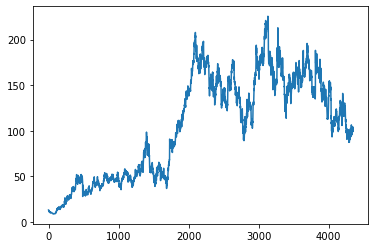

In [8]:
plt.plot(df.Close)

In [9]:
ma100=df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
4343    97.1525
4344    97.0175
4345    96.9700
4346    96.9725
4347    96.9245
Name: Close, Length: 4348, dtype: float64

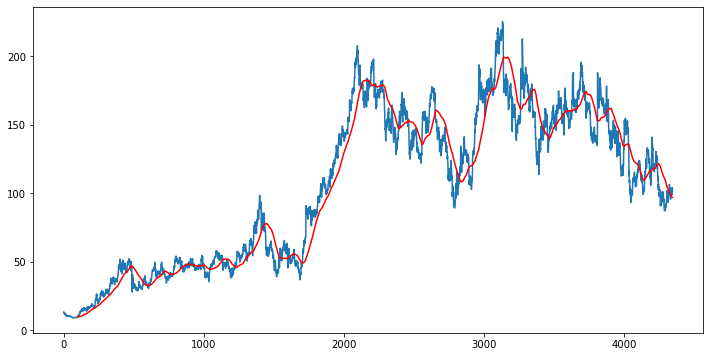

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4343    109.31175
4344    109.29950
4345    109.31575
4346    109.32525
4347    109.29425
Name: Close, Length: 4348, dtype: float64

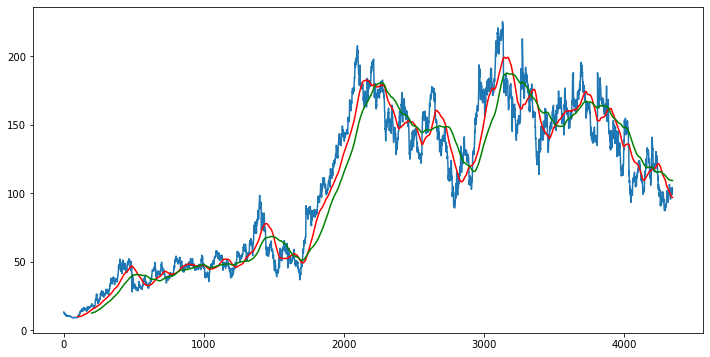

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(4348, 5)

In [14]:
#Splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)   
print(data_testing.shape)

(3043, 1)
(1305, 1)


In [15]:
data_training.head()

,Close
0,13.09
1,12.37
2,12.13
3,12.07
4,11.86


In [16]:
data_testing.head()

,Close
3043,177.009995
3044,178.050003
3045,180.470001
3046,181.220001
3047,184.779999


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02165721],
       [0.0180393 ],
       [0.01683333],
       ...,
       [0.85000758],
       [0.84628914],
       [0.83689266]])

In [19]:
data_training_array.shape

(3043, 1)

In [20]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [21]:
x_train.shape

(2943, 100, 1)

In [22]:
#Ml model

In [23]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [24]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [25]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape= (x_train.shape[1], 1)))  
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))  
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))  
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))  
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
92/92 [==============================] - 64s 643ms/step - loss: 0.0353
Epoch 2/5
92/92 [==============================] - 56s 606ms/step - loss: 0.0086
Epoch 3/5
92/92 [==============================] - 56s 612ms/step - loss: 0.0070
Epoch 4/5
92/92 [==============================] - 57s 615ms/step - loss: 0.0062
Epoch 5/5
92/92 [==============================] - 60s 649ms/step - loss: 0.0057


In [28]:
model.save('keras_model.h5')

In [29]:
data_training.tail(100)

,Close
2943,157.419998
2944,155.570007
2945,150.619995
2946,151.529999
2947,154.259995
...,...
3038,174.300003
3039,177.809998
3040,177.940002
3041,177.199997


In [30]:
data_testing.head()

,Close
3043,177.009995
3044,178.050003
3045,180.470001
3046,181.220001
3047,184.779999


In [31]:
past_100days=data_training.tail(100)

In [32]:
# final_df=past_100days.append(data_testing,ignore_index=True)
final_df = pd.concat([past_100days, data_testing], ignore_index=True)

In [33]:
final_df.head()

,Close
0,157.419998
1,155.570007
2,150.619995
3,151.529999
4,154.259995


In [34]:
input_data=scaler.fit_transform(final_df)

In [35]:
input_data

array([[0.50726522],
       [0.49389147],
       [0.45810738],
       ...,
       [0.12289453],
       [0.11313527],
       [0.10590618]])

In [36]:
input_data.shape

(1405, 1)

In [37]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [38]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1305, 100, 1)
(1305,)


In [39]:
#making predictions
y_predicted=model.predict(x_test)

41/41 [==============================] - 8s 174ms/step


In [40]:
y_predicted.shape

(1305, 1)

In [41]:
y_test

array([0.64888306, 0.65640137, 0.67389576, ..., 0.12289453, 0.11313527,
       0.10590618])

In [42]:
y_predicted

array([[0.6266901 ],
       [0.6271847 ],
       [0.6275003 ],
       ...,
       [0.07498519],
       [0.075767  ],
       [0.07655632]], dtype=float32)

In [43]:
scaler.scale_

array([0.00722909])

In [44]:
scale_factor=1/0.00722909
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

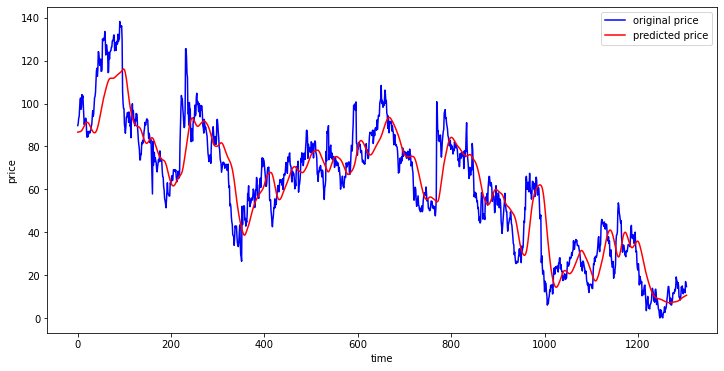

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()